# CNN Final Phase 1

In [1]:
!ls

drive  sample_data


In [2]:
%cd ./drive/MyDrive/data/

/content/drive/MyDrive/data


## Create generator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [4]:
all_images_gen = my_generator.flow_from_directory( './all_clash/', target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 1042 images belonging to 8 classes.


In [5]:
for batch in all_images_gen:
    images = batch[0]
    labels = batch[1]
    for i in range(len(labels)):
        print(images[i].shape) # (150,150,3)
        break
    break

(150, 150, 3)


## Import layers and plts

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input, GlobalAveragePooling2D

## check an image in the generator

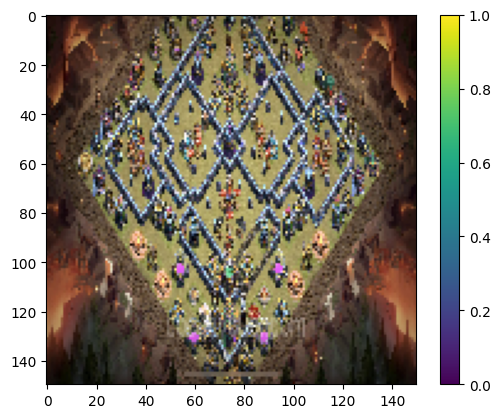

(150, 150, 3)
[0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
for my_batch in all_images_gen:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    break

## Initial model 3 CONV layers - 1 Dense 10 neurons - 83% acc
- 187k params

In [8]:
model = Sequential()
input = Input(shape=(150,150,3))
model.add(input)
model.add(Conv2D(filters=16, kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(4, 4))
model.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'relu' ))
model.add(Dense(8, activation = 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       163,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,522 (732.51 KB)

 Trainable params: 187,522 (732.51 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model.fit(all_images_gen, epochs=20, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 452s 14s/step - accuracy: 0.1719 - loss: 2.0713
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.2694 - loss: 1.7836
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3918 - loss: 1.5630
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4247 - loss: 1.3078
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.4660 - loss: 1.2615
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5777 - loss: 1.1092
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7142 - loss: 0.9446
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6973 - loss: 0.9285
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7026 - loss: 0.8631
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7147 - loss: 0.8040
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7228 - loss: 0.7425
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7437 - 

In [10]:
history_dict = {}
history_dict["model"] =  {
    'history': history.history,
    'epochs': 20
}

In [11]:
print(history_dict)

{'model': {'history': {'accuracy': [0.19289827346801758, 0.29846447706222534, 0.39443376660346985, 0.45489442348480225, 0.4971209168434143, 0.6190019249916077, 0.6976967453956604, 0.7044146060943604, 0.7197696566581726, 0.7293666005134583, 0.7312859892845154, 0.7485604882240295, 0.7466410994529724, 0.8157389760017395, 0.8310940265655518, 0.8205374479293823, 0.7879078984260559, 0.8090211153030396, 0.841650664806366, 0.8454894423484802], 'loss': [2.018131971359253, 1.7139780521392822, 1.5186209678649902, 1.2953169345855713, 1.1950238943099976, 1.0688672065734863, 0.976004958152771, 0.9023427367210388, 0.8249397277832031, 0.7677395343780518, 0.7294801473617554, 0.6868172883987427, 0.8347995281219482, 0.6059861183166504, 0.5446509122848511, 0.5645833611488342, 0.6103025078773499, 0.5644403696060181, 0.49091094732284546, 0.4729049503803253]}, 'epochs': 20}}


## 5 CONV layers - 200 neuron Dense - 1.6m params - 95% acc

In [12]:
model_1 = Sequential()
input = Input(shape=(150,150,3))

model_1.add(input)

model_1.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
model_1.add(MaxPooling2D(2, 2))

model_1.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_1.add(MaxPooling2D(2, 2))

model_1.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_1.add(MaxPooling2D(2, 2))

model_1.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_1.add(MaxPooling2D(2,2))

model_1.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_1.add(MaxPooling2D(2,2))

model_1.add(Flatten())
model_1.add(Dense(200, activation = 'relu' ))
model_1.add(Dense(8, activation = 'softmax'))

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       409,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,979,984 (7.55 MB)

 Trainable params: 1,979,984 (7.55 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model_1.fit(all_images_gen, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.1287 - loss: 2.0889
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.2540 - loss: 1.7927
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4823 - loss: 1.2611
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6209 - loss: 0.9045
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7377 - loss: 0.6676
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7621 - loss: 0.5786
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7482 - loss: 0.6225
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8269 - loss: 0.4322
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7747 - loss: 0.5580
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8327 - loss: 0.4239
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8815 - loss: 0.3063
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9094 - lo

In [14]:
history_dict

{'model': {'history': {'accuracy': [0.19289827346801758,
    0.29846447706222534,
    0.39443376660346985,
    0.45489442348480225,
    0.4971209168434143,
    0.6190019249916077,
    0.6976967453956604,
    0.7044146060943604,
    0.7197696566581726,
    0.7293666005134583,
    0.7312859892845154,
    0.7485604882240295,
    0.7466410994529724,
    0.8157389760017395,
    0.8310940265655518,
    0.8205374479293823,
    0.7879078984260559,
    0.8090211153030396,
    0.841650664806366,
    0.8454894423484802],
   'loss': [2.018131971359253,
    1.7139780521392822,
    1.5186209678649902,
    1.2953169345855713,
    1.1950238943099976,
    1.0688672065734863,
    0.976004958152771,
    0.9023427367210388,
    0.8249397277832031,
    0.7677395343780518,
    0.7294801473617554,
    0.6868172883987427,
    0.8347995281219482,
    0.6059861183166504,
    0.5446509122848511,
    0.5645833611488342,
    0.6103025078773499,
    0.5644403696060181,
    0.49091094732284546,
    0.472904950380325

In [15]:
history_dict["model_1"] =  {
    'history': history.history,
    'epochs': 20
}

## Check a prediction

True Label: th_13 (index 3)
Predicted Probabilities:
Class th_10 (index 0): 0.0000
Class th_11 (index 1): 0.0000
Class th_12 (index 2): 0.0138
Class th_13 (index 3): 0.9516
Class th_14 (index 4): 0.0056
Class th_15 (index 5): 0.0289
Class th_16 (index 6): 0.0000
Class th_17 (index 7): 0.0001
Predicted Class: th_13 (index 3)


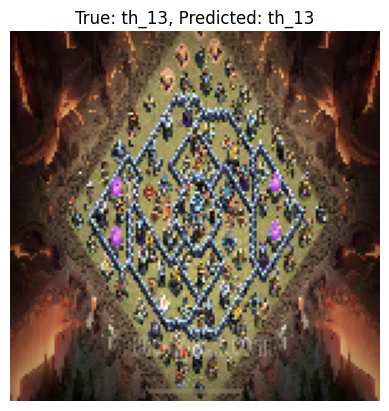

In [16]:
x, y = next(all_images_gen)
example_idx = 0
example_image = x[example_idx]
true_label = np.argmax(y[example_idx])

# Predict probabilities for the example
example_image = np.expand_dims(example_image, axis=0)  # Shape: (1, 150, 150, 3)
predictions = model_1.predict(example_image, verbose=0)  # Shape: (1, 8)
probabilities = predictions[0]  # Shape: (8,)

# Get class names (from generator)
class_names = list(all_images_gen.class_indices.keys())  # e.g., ['th_10', 'th_11', ..., 'th_17']

# Print probabilities for each class
print(f"True Label: {class_names[true_label]} (index {true_label})")
print("Predicted Probabilities:")
for i, prob in enumerate(probabilities):
    print(f"Class {class_names[i]} (index {i}): {prob:.4f}")

# Print predicted class
predicted_class = np.argmax(probabilities)
print(f"Predicted Class: {class_names[predicted_class]} (index {predicted_class})")

# Visualize the example image
plt.imshow(example_image[0])
plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()

## 4 CONV - Dense 10 - 1.5m params - 84% acc

In [17]:
model_2 = Sequential()
input = Input(shape=(150,150,3))

model_2.add(input)
model_2.add(Conv2D(64,(3, 3), activation = 'relu'))
model_2.add(MaxPooling2D(2, 2))

model_2.add(Conv2D(128, (3, 3), activation = 'relu'))
model_2.add(MaxPooling2D(2, 2))

model_2.add(Conv2D(256, (3, 3), activation = 'relu'))
model_2.add(MaxPooling2D(2,2))

model_2.add(Conv2D(512, (3, 3), activation = 'relu'))
model_2.add(GlobalAveragePooling2D())

model_2.add(Dense(10, activation = 'relu' ))
model_2.add(Dense(8, activation = 'softmax'))

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,556,194 (5.94 MB)

 Trainable params: 1,556,194 (5.94 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_2.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model_2.fit(all_images_gen, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.1072 - loss: 2.0907
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1407 - loss: 2.0791
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1671 - loss: 2.0126
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.2715 - loss: 1.7258
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3263 - loss: 1.5941
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4836 - loss: 1.2482
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5269 - loss: 1.1355
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5820 - loss: 1.0222
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5848 - loss: 0.9940
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5984 - loss: 1.0076
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5998 - loss: 0.9623
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6919 - lo

In [19]:
history_dict["model_2"] =  {
    'history': history.history,
    'epochs': 20
}
print(history_dict)

{'model': {'history': {'accuracy': [0.19289827346801758, 0.29846447706222534, 0.39443376660346985, 0.45489442348480225, 0.4971209168434143, 0.6190019249916077, 0.6976967453956604, 0.7044146060943604, 0.7197696566581726, 0.7293666005134583, 0.7312859892845154, 0.7485604882240295, 0.7466410994529724, 0.8157389760017395, 0.8310940265655518, 0.8205374479293823, 0.7879078984260559, 0.8090211153030396, 0.841650664806366, 0.8454894423484802], 'loss': [2.018131971359253, 1.7139780521392822, 1.5186209678649902, 1.2953169345855713, 1.1950238943099976, 1.0688672065734863, 0.976004958152771, 0.9023427367210388, 0.8249397277832031, 0.7677395343780518, 0.7294801473617554, 0.6868172883987427, 0.8347995281219482, 0.6059861183166504, 0.5446509122848511, 0.5645833611488342, 0.6103025078773499, 0.5644403696060181, 0.49091094732284546, 0.4729049503803253]}, 'epochs': 20}, 'model_1': {'history': {'accuracy': [0.137236088514328, 0.2859884798526764, 0.5287907719612122, 0.6717850565910339, 0.718809962272644, 

## 8 CONV - 100 neuron dense and 50 - neuron dense - 4.7m params - 12% acc

In [23]:
model_3 = Sequential()
input = Input(shape=(150,150,3))

model_3.add(input)
model_3.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_3.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_3.add(MaxPooling2D(2, 2))

model_3.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_3.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_3.add(MaxPooling2D(2, 2))

model_3.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_3.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_3.add(MaxPooling2D(2,2))

model_3.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_3.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_3.add(GlobalAveragePooling2D())

model_3.add(Dense(100, activation = 'relu' ))
model_3.add(Dense(50, activation = 'relu' ))
model_3.add(Dense(8, activation = 'softmax'))

model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 146, 146, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 69, 69, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 13, 13, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,742,134 (18.09 MB)

 Trainable params: 4,742,134 (18.09 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_3.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model_3.fit(all_images_gen, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.1233 - loss: 2.0929
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1465 - loss: 2.0784
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1393 - loss: 2.0782
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1476 - loss: 2.0786
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1388 - loss: 2.0793
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1232 - loss: 2.0909
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1407 - loss: 2.0791
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1385 - loss: 2.0774
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1385 - loss: 2.0793
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1508 - loss: 2.0758
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1322 - loss: 2.0806
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1401 - lo

In [25]:
history_dict["model_3"] =  {
    'history': history.history,
    'epochs': 20
}
print(history_dict)

{'model': {'history': {'accuracy': [0.19289827346801758, 0.29846447706222534, 0.39443376660346985, 0.45489442348480225, 0.4971209168434143, 0.6190019249916077, 0.6976967453956604, 0.7044146060943604, 0.7197696566581726, 0.7293666005134583, 0.7312859892845154, 0.7485604882240295, 0.7466410994529724, 0.8157389760017395, 0.8310940265655518, 0.8205374479293823, 0.7879078984260559, 0.8090211153030396, 0.841650664806366, 0.8454894423484802], 'loss': [2.018131971359253, 1.7139780521392822, 1.5186209678649902, 1.2953169345855713, 1.1950238943099976, 1.0688672065734863, 0.976004958152771, 0.9023427367210388, 0.8249397277832031, 0.7677395343780518, 0.7294801473617554, 0.6868172883987427, 0.8347995281219482, 0.6059861183166504, 0.5446509122848511, 0.5645833611488342, 0.6103025078773499, 0.5644403696060181, 0.49091094732284546, 0.4729049503803253]}, 'epochs': 20}, 'model_1': {'history': {'accuracy': [0.137236088514328, 0.2859884798526764, 0.5287907719612122, 0.6717850565910339, 0.718809962272644, 

## 8 CONV - 1000 neuron dense and 500 - neuron dense - 5.7m params - 91% acc

In [83]:
model_7 = Sequential()
input = Input(shape=(150,150,3))

model_7.add(input)
model_7.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_7.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_7.add(MaxPooling2D(2, 2))

model_7.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_7.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_7.add(MaxPooling2D(2, 2))

model_7.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_7.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_7.add(MaxPooling2D(2,2))

model_7.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_7.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_7.add(GlobalAveragePooling2D())

model_7.add(Dense(1000, activation = 'relu' ))
model_7.add(Dense(500, activation = 'relu' ))
model_7.add(Dense(8, activation = 'softmax'))

model_7.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_154 (Conv2D)             │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_155 (Conv2D)             │ (None, 146, 146, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_101               │ (None, 73, 73, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_156 (Conv2D)             │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_157 (Conv2D)             │ (None, 69, 69, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_102               │ (None, 34, 34, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_158 (Conv2D)             │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_159 (Conv2D)             │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_103               │ (None, 15, 15, 256)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_160 (Conv2D)             │ (None, 13, 13, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_161 (Conv2D)             │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_17     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1000)           │       513,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 8)              │         4,008 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,702,884 (21.75 MB)

 Trainable params: 5,702,884 (21.75 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model_7.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model_7.fit(all_images_gen, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.1354 - loss: 2.1295
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.1244 - loss: 2.0486
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.2456 - loss: 1.6645
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.2667 - loss: 1.6193
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.3661 - loss: 1.4157
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.4028 - loss: 1.2510
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5604 - loss: 0.9746
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.5886 - loss: 0.9156
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.5447 - loss: 1.0243
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6326 - loss: 0.8292
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7715 - loss: 0.5425
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7957 - lo

In [87]:
history_dict["model_7"] =  {
    'history': history.history,
    'epochs': 20
}
print(history_dict)

{'model': {'history': {'accuracy': [0.19289827346801758, 0.29846447706222534, 0.39443376660346985, 0.45489442348480225, 0.4971209168434143, 0.6190019249916077, 0.6976967453956604, 0.7044146060943604, 0.7197696566581726, 0.7293666005134583, 0.7312859892845154, 0.7485604882240295, 0.7466410994529724, 0.8157389760017395, 0.8310940265655518, 0.8205374479293823, 0.7879078984260559, 0.8090211153030396, 0.841650664806366, 0.8454894423484802], 'loss': [2.018131971359253, 1.7139780521392822, 1.5186209678649902, 1.2953169345855713, 1.1950238943099976, 1.0688672065734863, 0.976004958152771, 0.9023427367210388, 0.8249397277832031, 0.7677395343780518, 0.7294801473617554, 0.6868172883987427, 0.8347995281219482, 0.6059861183166504, 0.5446509122848511, 0.5645833611488342, 0.6103025078773499, 0.5644403696060181, 0.49091094732284546, 0.4729049503803253]}, 'epochs': 20}, 'model_1': {'history': {'accuracy': [0.137236088514328, 0.2859884798526764, 0.5287907719612122, 0.6717850565910339, 0.718809962272644, 

## 6 CONV - 1000 Dense - 2.6m params - 97% acc

In [79]:
model_6 = Sequential()
input = Input(shape=(150,150,3))

model_6.add(input)
model_6.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
model_6.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_6.add(MaxPooling2D(2,2))

model_6.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_6.add(MaxPooling2D(2, 2))

model_6.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_6.add(MaxPooling2D(2,2))
model_6.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_6.add(MaxPooling2D(2,2))

model_6.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_6.add(MaxPooling2D(2,2))
model_6.add(GlobalAveragePooling2D())

model_6.add(Dense(1000, activation = 'relu'))
model_6.add(Dense(8, activation = 'softmax'))

model_6.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_140 (Conv2D)             │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_141 (Conv2D)             │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_142 (Conv2D)             │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_143 (Conv2D)             │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_144 (Conv2D)             │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_145 (Conv2D)             │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_15     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1000)           │       513,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 8)              │         8,008 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,679,664 (10.22 MB)

 Trainable params: 2,679,664 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model_6.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model_6.fit(all_images_gen, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.1092 - loss: 2.0887
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.1644 - loss: 1.9929
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.2316 - loss: 1.6940
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.3943 - loss: 1.3852
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.5228 - loss: 1.1136
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5423 - loss: 1.0944
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6163 - loss: 0.8998
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.7119 - loss: 0.7035
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.8097 - loss: 0.4988
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7649 - loss: 0.6453
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.8370 - loss: 0.4574
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9011 - lo

In [81]:
history_dict["model_6"] =  {
    'history': history.history,
    'epochs': 20
}
print(history_dict)

{'model': {'history': {'accuracy': [0.19289827346801758, 0.29846447706222534, 0.39443376660346985, 0.45489442348480225, 0.4971209168434143, 0.6190019249916077, 0.6976967453956604, 0.7044146060943604, 0.7197696566581726, 0.7293666005134583, 0.7312859892845154, 0.7485604882240295, 0.7466410994529724, 0.8157389760017395, 0.8310940265655518, 0.8205374479293823, 0.7879078984260559, 0.8090211153030396, 0.841650664806366, 0.8454894423484802], 'loss': [2.018131971359253, 1.7139780521392822, 1.5186209678649902, 1.2953169345855713, 1.1950238943099976, 1.0688672065734863, 0.976004958152771, 0.9023427367210388, 0.8249397277832031, 0.7677395343780518, 0.7294801473617554, 0.6868172883987427, 0.8347995281219482, 0.6059861183166504, 0.5446509122848511, 0.5645833611488342, 0.6103025078773499, 0.5644403696060181, 0.49091094732284546, 0.4729049503803253]}, 'epochs': 20}, 'model_1': {'history': {'accuracy': [0.137236088514328, 0.2859884798526764, 0.5287907719612122, 0.6717850565910339, 0.718809962272644, 

## 4 CONV layers - 100 nueron dense - 1.6m params - 91% acc

In [26]:
model_4 = Sequential()
input = Input(shape=(150,150,3))

model_4.add(input)
model_4.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_4.add(MaxPooling2D(2, 2))

model_4.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_4.add(MaxPooling2D(2, 2))

model_4.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_4.add(MaxPooling2D(2,2))

model_4.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_4.add(GlobalAveragePooling2D())

model_4.add(Dense(100, activation = 'relu' ))
model_4.add(Dense(8, activation = 'softmax'))

model_4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,603,084 (6.12 MB)

 Trainable params: 1,603,084 (6.12 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model_4.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model_4.fit(all_images_gen, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.1093 - loss: 2.0699
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.3077 - loss: 1.5007
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5571 - loss: 1.1098
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6818 - loss: 0.8391
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7571 - loss: 0.6655
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7639 - loss: 0.6167
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8034 - loss: 0.5676
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8612 - loss: 0.3869
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8719 - loss: 0.3954
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8214 - loss: 0.4446
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8956 - loss: 0.2852
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9256 - lo

In [ ]:
history_dict["model_4"] = {
    "history": history.history,
    "epochs": 20
}

## 5 CONV layers - 512 neuron dense - 1.8m params - 93% acc

In [28]:
model_5 = Sequential()
input = Input(shape=(150,150,3))

model_5.add(input)
model_5.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
model_5.add(MaxPooling2D(2, 2))

model_5.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_5.add(MaxPooling2D(2, 2))

model_5.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_5.add(MaxPooling2D(2, 2))

model_5.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_5.add(MaxPooling2D(2,2))

model_5.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_5.add(MaxPooling2D(2,2))

model_5.add(GlobalAveragePooling2D())
model_5.add(Dense(512, activation = 'relu' ))
model_5.add(Dense(8, activation = 'softmax'))

model_5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,835,336 (7.00 MB)

 Trainable params: 1,835,336 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_5.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model_5.fit(all_images_gen, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.1097 - loss: 2.0904
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.1514 - loss: 2.0765
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.2121 - loss: 1.8941
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4021 - loss: 1.4400
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6041 - loss: 1.0262
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7035 - loss: 0.7288
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8084 - loss: 0.4950
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8684 - loss: 0.3781
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8573 - loss: 0.3711
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8879 - loss: 0.2979
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8620 - loss: 0.3546
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8782 - lo

In [30]:
history_dict["model_5"] =  {
    'history': history.history,
    'epochs': 20
}

In [31]:
print(history_dict)

{'model': {'history': {'accuracy': [0.19289827346801758, 0.29846447706222534, 0.39443376660346985, 0.45489442348480225, 0.4971209168434143, 0.6190019249916077, 0.6976967453956604, 0.7044146060943604, 0.7197696566581726, 0.7293666005134583, 0.7312859892845154, 0.7485604882240295, 0.7466410994529724, 0.8157389760017395, 0.8310940265655518, 0.8205374479293823, 0.7879078984260559, 0.8090211153030396, 0.841650664806366, 0.8454894423484802], 'loss': [2.018131971359253, 1.7139780521392822, 1.5186209678649902, 1.2953169345855713, 1.1950238943099976, 1.0688672065734863, 0.976004958152771, 0.9023427367210388, 0.8249397277832031, 0.7677395343780518, 0.7294801473617554, 0.6868172883987427, 0.8347995281219482, 0.6059861183166504, 0.5446509122848511, 0.5645833611488342, 0.6103025078773499, 0.5644403696060181, 0.49091094732284546, 0.4729049503803253]}, 'epochs': 20}, 'model_1': {'history': {'accuracy': [0.137236088514328, 0.2859884798526764, 0.5287907719612122, 0.6717850565910339, 0.718809962272644, 

## Metrics

In [34]:

def calc_metrics(model):
    true_labels = []
    pred_labels = []
    for i in range(len(all_images_gen)):
        x, y = next(all_images_gen)
        p = model.predict(x, verbose=0)

        true_labels.extend(np.argmax(y, axis=1))  # True class indices (0 to 7)
        pred_labels.extend(np.argmax(p, axis=1))  # Predicted class indices (0 to 7)

    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)

    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')
    f1 = f1_score(true_labels, pred_labels, average='weighted')

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")

## Model metrics

In [35]:
calc_metrics(model)

Accuracy: 0.8311
Precision (weighted): 0.7818
Recall (weighted): 0.8311
F1-Score (weighted): 0.7913


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
calc_metrics(model_1)

Accuracy: 0.9203
Precision (weighted): 0.9252
Recall (weighted): 0.9203
F1-Score (weighted): 0.9200


In [37]:
calc_metrics(model_2)

Accuracy: 0.8618
Precision (weighted): 0.8805
Recall (weighted): 0.8618
F1-Score (weighted): 0.8559


In [38]:
calc_metrics(model_3)

Accuracy: 0.1344
Precision (weighted): 0.0181
Recall (weighted): 0.1344
F1-Score (weighted): 0.0318


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
calc_metrics(model_4)

Accuracy: 0.9405
Precision (weighted): 0.9470
Recall (weighted): 0.9405
F1-Score (weighted): 0.9399


In [40]:
calc_metrics(model_5)

Accuracy: 0.8791
Precision (weighted): 0.8865
Recall (weighted): 0.8791
F1-Score (weighted): 0.8750


# Output as Input

## Turn gen into lists

In [41]:
num_samples = all_images_gen.samples
height, width, channels = 150, 150, 3

mydatax = np.zeros((num_samples, height, width, channels + 1))  # RGB + label channel
mydatay = np.zeros(num_samples, dtype=np.int32)

# Iterate through the generator to fill arrays
sample_idx = 0
for i in range(len(all_images_gen)):
    x, y = next(all_images_gen)
    batch_size = x.shape[0]

    y_indices = np.argmax(y, axis=1)

    for j in range(batch_size):
        # Store RGB image in first three channels
        mydatax[sample_idx, :, :, :3] = x[j]
        mydatax[sample_idx, :, :, 3] = y_indices[j]
        mydatay[sample_idx] = y_indices[j]
        sample_idx += 1

print(f"mydatax shape: {mydatax.shape}")  # (num_samples, 150, 150, 4)
print(f"mydatay shape: {mydatay.shape}")  # (num_samples,)

mydatax shape: (1042, 150, 150, 4)
mydatay shape: (1042,)


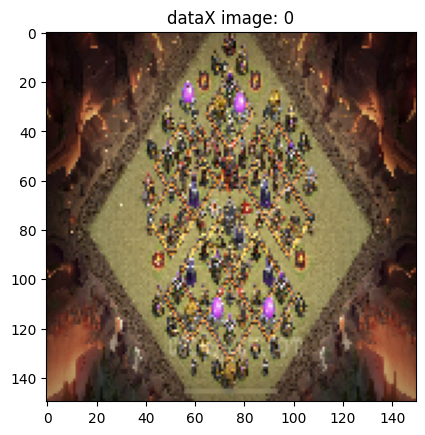

In [42]:
plt.imshow(mydatax[0, :, :, :3])
plt.title(f"dataX image: {mydatay[0]}")
plt.show()

## 4 CONV - 50 neuron dense - 1.4m params - OVERFIT

In [45]:
model_output = Sequential()
input_out = Input(shape=(150,150,4))

model_output.add(input_out)
model_output.add(Conv2D(filters=32, kernel_size=3, activation = 'relu', padding='same'))
model_output.add(MaxPooling2D(2, 2))

model_output.add(Conv2D(filters=64, kernel_size=3, activation = 'relu', padding='same'))
model_output.add(MaxPooling2D(2, 2))

model_output.add(Conv2D(filters=128, kernel_size=3, activation = 'relu', padding='same'))
model_output.add(MaxPooling2D(2, 2))

model_output.add(Conv2D(filters=256, kernel_size=3, activation = 'relu', padding='same'))
model_output.add(MaxPooling2D(2, 2))

model_output.add(Flatten())
model_output.add(Dense(50, activation = 'relu' ))
model_output.add(Dense(8, activation = 'softmax'))

model_output.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 150, 150, 32)   │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │     1,036,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425,962 (5.44 MB)

 Trainable params: 1,425,962 (5.44 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model_output.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_output = model_output.fit(mydatax, mydatay, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.4028 - loss: 1.4316
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7326 - loss: 0.6630
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8404 - loss: 0.3673
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9334 - loss: 0.1859
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9195 - loss: 0.2687
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8942 - loss: 0.3206
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0120
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9319 - loss: 0.2750
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0149
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0027
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy

In [47]:
history_out_dict = {}

In [48]:
history_out_dict["model_out"] = {
    "history": history_output.history,
    "epochs": 20
}

In [49]:
history_out_dict

{'model_out': {'history': {'accuracy': [0.5191938877105713,
    0.7658349275588989,
    0.8522073030471802,
    0.9481765627861023,
    0.823416531085968,
    0.9270633459091187,
    1.0,
    0.9424183964729309,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0],
   'loss': [1.0912795066833496,
    0.6038771271705627,
    0.33008432388305664,
    0.15265055000782013,
    0.5003300309181213,
    0.22991186380386353,
    0.007820002734661102,
    0.22865940630435944,
    0.010788818821310997,
    0.002198717324063182,
    0.0010183303384110332,
    0.0006748493178747594,
    0.0004906134563498199,
    0.00038352335104718804,
    0.0003142388886772096,
    0.0002622682077344507,
    0.00021934436517767608,
    0.0001916864130180329,
    0.00016849093663040549,
    0.00014746996748726815]},
  'epochs': 20}}

## 4 CONV - 25 neuron dense - 900k params - 83% acc

In [50]:
model_output_1 = Sequential()
input_out_1 = Input(shape=(150,150,4))

model_output_1.add(input_out_1)
model_output_1.add(Conv2D(filters=32, kernel_size=3, activation = 'relu', padding='same'))
model_output_1.add(MaxPooling2D(2, 2))

model_output_1.add(Conv2D(filters=64, kernel_size=3, activation = 'relu', padding='same'))
model_output_1.add(MaxPooling2D(2, 2))

model_output_1.add(Conv2D(filters=128, kernel_size=3, activation = 'relu', padding='same'))
model_output_1.add(MaxPooling2D(2, 2))

model_output_1.add(Conv2D(filters=256, kernel_size=3, activation = 'relu', padding='same'))
model_output_1.add(MaxPooling2D(2, 2))

model_output_1.add(Flatten())
model_output_1.add(Dense(25, activation = 'relu' ))
model_output_1.add(Dense(8, activation = 'softmax'))

model_output_1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 150, 150, 32)   │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │       518,425 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 907,337 (3.46 MB)

 Trainable params: 907,337 (3.46 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_output_1.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_output = model_output_1.fit(mydatax, mydatay, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.3399 - loss: 1.7438
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6875 - loss: 1.2884
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7007 - loss: 0.6698
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7454 - loss: 0.4851
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8884 - loss: 0.3031
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7338 - loss: 0.6981
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6726 - loss: 0.6446
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8513 - loss: 0.3483
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9456 - loss: 0.1380
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0040
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 9.0424e-04
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accur

In [52]:
history_out_dict["model_out_1"] = {
    "history": history_output.history,
    "epochs": 20
}

## 4 CONV - 10 neuron dense - 596k params - 46%

In [54]:
model_output_2 = Sequential()
input_out_1 = Input(shape=(150,150,4))

model_output_2.add(input_out_1)
model_output_2.add(Conv2D(filters=32, kernel_size=3, activation = 'relu', padding='same'))
model_output_2.add(MaxPooling2D(2, 2))

model_output_2.add(Conv2D(filters=64, kernel_size=3, activation = 'relu', padding='same'))
model_output_2.add(MaxPooling2D(2, 2))

model_output_2.add(Conv2D(filters=128, kernel_size=3, activation = 'relu', padding='same'))
model_output_2.add(MaxPooling2D(2, 2))

model_output_2.add(Conv2D(filters=256, kernel_size=3, activation = 'relu', padding='same'))
model_output_2.add(MaxPooling2D(2, 2))

model_output_2.add(Flatten())
model_output_2.add(Dense(10, activation = 'relu' ))
model_output_2.add(Dense(8, activation = 'softmax'))

model_output_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 150, 150, 32)   │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │       207,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,162 (2.27 MB)

 Trainable params: 596,162 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model_output_2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_output = model_output_2.fit(mydatax, mydatay, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.2374 - loss: 1.8888
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3547 - loss: 1.5326
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3660 - loss: 1.5086
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3879 - loss: 1.4252
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4243 - loss: 1.5858
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3782 - loss: 1.1898
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5025 - loss: 1.0752
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7105 - loss: 0.8584
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7184 - loss: 0.7936
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7132 - loss: 0.7001
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7302 - loss: 0.7077
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy:

In [56]:
history_out_dict["model_out_2"] = {
    "history": history_output.history,
    "epochs": 20
}

print(history_out_dict)

{'model_out': {'history': {'accuracy': [0.5191938877105713, 0.7658349275588989, 0.8522073030471802, 0.9481765627861023, 0.823416531085968, 0.9270633459091187, 1.0, 0.9424183964729309, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.0912795066833496, 0.6038771271705627, 0.33008432388305664, 0.15265055000782013, 0.5003300309181213, 0.22991186380386353, 0.007820002734661102, 0.22865940630435944, 0.010788818821310997, 0.002198717324063182, 0.0010183303384110332, 0.0006748493178747594, 0.0004906134563498199, 0.00038352335104718804, 0.0003142388886772096, 0.0002622682077344507, 0.00021934436517767608, 0.0001916864130180329, 0.00016849093663040549, 0.00014746996748726815]}, 'epochs': 20}, 'model_out_1': {'history': {'accuracy': [0.45777350664138794, 0.6880998015403748, 0.665067195892334, 0.7879078984260559, 0.8800383806228638, 0.6545105576515198, 0.7264875173568726, 0.8733205199241638, 0.9779270887374878, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': 

## 5 CONV - 10 neuron dense - 1.6m params - 12% acc

In [57]:
model_output_3 = Sequential()
input_out_1 = Input(shape=(150,150,4))

model_output_3.add(input_out_1)
model_output_3.add(Conv2D(filters=32, kernel_size=3, activation = 'relu', padding='same'))
model_output_3.add(MaxPooling2D(2, 2))

model_output_3.add(Conv2D(filters=64, kernel_size=3, activation = 'relu', padding='same'))
model_output_3.add(MaxPooling2D(2, 2))

model_output_3.add(Conv2D(filters=128, kernel_size=3, activation = 'relu', padding='same'))
model_output_3.add(MaxPooling2D(2, 2))

model_output_3.add(Conv2D(filters=256, kernel_size=3, activation = 'relu', padding='same'))
model_output_3.add(MaxPooling2D(2, 2))

model_output_3.add(Conv2D(filters=512, kernel_size=3, activation = 'relu', padding='same'))
model_output_3.add(MaxPooling2D(2, 2))

model_output_3.add(Flatten())
model_output_3.add(Dense(10, activation = 'relu' ))
model_output_3.add(Dense(8, activation = 'softmax'))

model_output_3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 150, 150, 32)   │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │        81,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,650,882 (6.30 MB)

 Trainable params: 1,650,882 (6.30 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model_output_3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_output = model_output_3.fit(mydatax, mydatay, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.1231 - loss: 2.1247
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1102 - loss: 2.0794
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1296 - loss: 2.0795
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1375 - loss: 2.0793
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1541 - loss: 2.0788
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1357 - loss: 2.0793
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1302 - loss: 2.0790
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1304 - loss: 2.0784
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1268 - loss: 2.0790
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1357 - loss: 2.0790
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1384 - loss: 2.0795
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy

In [59]:
history_out_dict["model_out_3"] = {
    "history": history_output.history,
    "epochs": 20
}

print(history_out_dict)

{'model_out': {'history': {'accuracy': [0.5191938877105713, 0.7658349275588989, 0.8522073030471802, 0.9481765627861023, 0.823416531085968, 0.9270633459091187, 1.0, 0.9424183964729309, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.0912795066833496, 0.6038771271705627, 0.33008432388305664, 0.15265055000782013, 0.5003300309181213, 0.22991186380386353, 0.007820002734661102, 0.22865940630435944, 0.010788818821310997, 0.002198717324063182, 0.0010183303384110332, 0.0006748493178747594, 0.0004906134563498199, 0.00038352335104718804, 0.0003142388886772096, 0.0002622682077344507, 0.00021934436517767608, 0.0001916864130180329, 0.00016849093663040549, 0.00014746996748726815]}, 'epochs': 20}, 'model_out_1': {'history': {'accuracy': [0.45777350664138794, 0.6880998015403748, 0.665067195892334, 0.7879078984260559, 0.8800383806228638, 0.6545105576515198, 0.7264875173568726, 0.8733205199241638, 0.9779270887374878, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': 

## 5 CONV layers - 512 neuron dense - 1.8m params - 100% acc - OVERFIT

In [62]:
model_output_4 = Sequential()
input_out = Input(shape=(150,150,4))

model_output_4.add(input_out)
model_output_4.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
model_output_4.add(MaxPooling2D(2, 2))

model_output_4.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_output_4.add(MaxPooling2D(2, 2))

model_output_4.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_output_4.add(MaxPooling2D(2, 2))

model_output_4.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_output_4.add(MaxPooling2D(2,2))

model_output_4.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_output_4.add(MaxPooling2D(2,2))

model_output_4.add(GlobalAveragePooling2D())
model_output_4.add(Dense(512, activation = 'relu' ))
model_output_4.add(Dense(8, activation = 'softmax'))

model_output_4.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_61 (Conv2D)              │ (None, 148, 148, 32)   │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,835,624 (7.00 MB)

 Trainable params: 1,835,624 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model_output_4.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_output = model_output_4.fit(mydatax, mydatay, epochs=20, batch_size=32)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.3042 - loss: 1.6310
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7864 - loss: 0.5102
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8680 - loss: 0.3046
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8853 - loss: 0.4590
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8758 - loss: 0.2721
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9730 - loss: 0.0725
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6966 - loss: 0.7408
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9836 - loss: 0.0611
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9846 - loss: 0.0564
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9699 - loss: 0.0955
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9581 - loss: 0.1537
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy

In [64]:
history_out_dict["model_out_4"] = {
    "history": history_output.history,
    "epochs": 20
}

print(history_out_dict)

{'model_out': {'history': {'accuracy': [0.5191938877105713, 0.7658349275588989, 0.8522073030471802, 0.9481765627861023, 0.823416531085968, 0.9270633459091187, 1.0, 0.9424183964729309, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.0912795066833496, 0.6038771271705627, 0.33008432388305664, 0.15265055000782013, 0.5003300309181213, 0.22991186380386353, 0.007820002734661102, 0.22865940630435944, 0.010788818821310997, 0.002198717324063182, 0.0010183303384110332, 0.0006748493178747594, 0.0004906134563498199, 0.00038352335104718804, 0.0003142388886772096, 0.0002622682077344507, 0.00021934436517767608, 0.0001916864130180329, 0.00016849093663040549, 0.00014746996748726815]}, 'epochs': 20}, 'model_out_1': {'history': {'accuracy': [0.45777350664138794, 0.6880998015403748, 0.665067195892334, 0.7879078984260559, 0.8800383806228638, 0.6545105576515198, 0.7264875173568726, 0.8733205199241638, 0.9779270887374878, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': 

{'model_out': {'history': {'accuracy': [0.5191938877105713,
    0.7658349275588989,
    0.8522073030471802,
    0.9481765627861023,
    0.823416531085968,
    0.9270633459091187,
    1.0,
    0.9424183964729309,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0],
   'loss': [1.0912795066833496,
    0.6038771271705627,
    0.33008432388305664,
    0.15265055000782013,
    0.5003300309181213,
    0.22991186380386353,
    0.007820002734661102,
    0.22865940630435944,
    0.010788818821310997,
    0.002198717324063182,
    0.0010183303384110332,
    0.0006748493178747594,
    0.0004906134563498199,
    0.00038352335104718804,
    0.0003142388886772096,
    0.0002622682077344507,
    0.00021934436517767608,
    0.0001916864130180329,
    0.00016849093663040549,
    0.00014746996748726815]},
  'epochs': 20},
 'model_out_1': {'history': {'accuracy': [0.45777350664138794,
    0.6880998015403748,
    0.665067195892334,
    0.787907898426

# Visulaizations

In [1]:
history_graphing = {'model': {'history': {'accuracy': [0.19289827346801758, 0.29846447706222534, 0.39443376660346985, 0.45489442348480225, 0.4971209168434143, 0.6190019249916077, 0.6976967453956604, 0.7044146060943604, 0.7197696566581726, 0.7293666005134583, 0.7312859892845154, 0.7485604882240295, 0.7466410994529724, 0.8157389760017395, 0.8310940265655518, 0.8205374479293823, 0.7879078984260559, 0.8090211153030396, 0.841650664806366, 0.8454894423484802], 'loss': [2.018131971359253, 1.7139780521392822, 1.5186209678649902, 1.2953169345855713, 1.1950238943099976, 1.0688672065734863, 0.976004958152771, 0.9023427367210388, 0.8249397277832031, 0.7677395343780518, 0.7294801473617554, 0.6868172883987427, 0.8347995281219482, 0.6059861183166504, 0.5446509122848511, 0.5645833611488342, 0.6103025078773499, 0.5644403696060181, 0.49091094732284546, 0.4729049503803253]}, 'epochs': 20}, 'model_1': {'history': {'accuracy': [0.137236088514328, 0.2859884798526764, 0.5287907719612122, 0.6717850565910339, 0.718809962272644, 0.7495201826095581, 0.7715930938720703, 0.8406909704208374, 0.7600767612457275, 0.8666026592254639, 0.8867562413215637, 0.9203454852104187, 0.944337785243988, 0.9299424290657043, 0.9644913673400879, 0.9712092280387878, 0.9683301448822021, 0.9750480055809021, 0.973128616809845, 0.9145873188972473], 'loss': [2.0661542415618896, 1.6947129964828491, 1.1418933868408203, 0.8172878623008728, 0.7068891525268555, 0.6059317588806152, 0.54993736743927, 0.43491682410240173, 0.6107118129730225, 0.3622397184371948, 0.30255773663520813, 0.21796873211860657, 0.18399156630039215, 0.1903630644083023, 0.09787651151418686, 0.08444391936063766, 0.08564600348472595, 0.06979000568389893, 0.07124502211809158, 0.25062477588653564]}, 'epochs': 20}, 'model_2': {'history': {'accuracy': [0.11996161192655563, 0.137236088514328, 0.1756238043308258, 0.30038386583328247, 0.3349328339099884, 0.4779270589351654, 0.5575816035270691, 0.5796545147895813, 0.5796545147895813, 0.6228407025337219, 0.6074855923652649, 0.7178502678871155, 0.740882933139801, 0.7821497321128845, 0.7332053780555725, 0.7955853939056396, 0.792706310749054, 0.8550863862037659, 0.8464491367340088, 0.863723635673523], 'loss': [2.083836793899536, 2.0783278942108154, 1.960347294807434, 1.6427969932556152, 1.540665864944458, 1.199405550956726, 1.106626272201538, 1.0271190404891968, 1.001981496810913, 0.9372532367706299, 0.9465081691741943, 0.8126957416534424, 0.7431008815765381, 0.6895431876182556, 0.7295631766319275, 0.6282879114151001, 0.6088746190071106, 0.47863340377807617, 0.47613170742988586, 0.4314891993999481]}, 'epochs': 20}, 'model_3': {'history': {'accuracy': [0.126679465174675, 0.13627639412879944, 0.13627639412879944, 0.13627639412879944, 0.13627639412879944, 0.13339731097221375, 0.13627639412879944, 0.13627639412879944, 0.13627639412879944, 0.13627639412879944, 0.12188100069761276, 0.13627639412879944, 0.13627639412879944, 0.13627639412879944, 0.13915547728538513, 0.13627639412879944, 0.13627639412879944, 0.13531669974327087, 0.13627639412879944, 0.13627639412879944], 'loss': [2.0844976902008057, 2.0795464515686035, 2.0791633129119873, 2.0789921283721924, 2.079360246658325, 2.088742256164551, 2.079078435897827, 2.0787899494171143, 2.0788700580596924, 2.078432083129883, 2.080073356628418, 2.0789830684661865, 2.0788447856903076, 2.0786726474761963, 2.0792365074157715, 2.078913927078247, 2.078674793243408, 2.0793442726135254, 2.07858943939209, 2.0786242485046387]}, 'epochs': 20}, 'model_5': {'history': {'accuracy': [0.10556621849536896, 0.1650671809911728, 0.2476007640361786, 0.4347408711910248, 0.6276391744613647, 0.732245683670044, 0.8262956142425537, 0.8771592974662781, 0.8474088311195374, 0.8704414367675781, 0.8378118872642517, 0.8973128795623779, 0.9088291525840759, 0.9337812066078186, 0.9011516571044922, 0.9270633459091187, 0.9625719785690308, 0.951055645942688, 0.93282151222229, 0.9433780908584595], 'loss': [2.0846469402313232, 2.071361541748047, 1.7734801769256592, 1.3316348791122437, 0.932502806186676, 0.6769766807556152, 0.4739188551902771, 0.35344141721725464, 0.3971610367298126, 0.3249782919883728, 0.40829789638519287, 0.27413254976272583, 0.23429827392101288, 0.1707039326429367, 0.24460551142692566, 0.1911621391773224, 0.09713517129421234, 0.1292533129453659, 0.1700447052717209, 0.141757994890213]}, 'epochs': 20}}
history_graphing

{'model': {'history': {'accuracy': [0.19289827346801758,
    0.29846447706222534,
    0.39443376660346985,
    0.45489442348480225,
    0.4971209168434143,
    0.6190019249916077,
    0.6976967453956604,
    0.7044146060943604,
    0.7197696566581726,
    0.7293666005134583,
    0.7312859892845154,
    0.7485604882240295,
    0.7466410994529724,
    0.8157389760017395,
    0.8310940265655518,
    0.8205374479293823,
    0.7879078984260559,
    0.8090211153030396,
    0.841650664806366,
    0.8454894423484802],
   'loss': [2.018131971359253,
    1.7139780521392822,
    1.5186209678649902,
    1.2953169345855713,
    1.1950238943099976,
    1.0688672065734863,
    0.976004958152771,
    0.9023427367210388,
    0.8249397277832031,
    0.7677395343780518,
    0.7294801473617554,
    0.6868172883987427,
    0.8347995281219482,
    0.6059861183166504,
    0.5446509122848511,
    0.5645833611488342,
    0.6103025078773499,
    0.5644403696060181,
    0.49091094732284546,
    0.472904950380325

In [2]:
history_out_graphing = {'model_out': {'history': {'accuracy': [0.5191938877105713, 0.7658349275588989, 0.8522073030471802, 0.9481765627861023, 0.823416531085968, 0.9270633459091187, 1.0, 0.9424183964729309, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.0912795066833496, 0.6038771271705627, 0.33008432388305664, 0.15265055000782013, 0.5003300309181213, 0.22991186380386353, 0.007820002734661102, 0.22865940630435944, 0.010788818821310997, 0.002198717324063182, 0.0010183303384110332, 0.0006748493178747594, 0.0004906134563498199, 0.00038352335104718804, 0.0003142388886772096, 0.0002622682077344507, 0.00021934436517767608, 0.0001916864130180329, 0.00016849093663040549, 0.00014746996748726815]}, 'epochs': 20}, 'model_out_1': {'history': {'accuracy': [0.45777350664138794, 0.6880998015403748, 0.665067195892334, 0.7879078984260559, 0.8800383806228638, 0.6545105576515198, 0.7264875173568726, 0.8733205199241638, 0.9779270887374878, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.2687691450119019, 1.0498889684677124, 0.7763844132423401, 0.4130758047103882, 0.3099861145019531, 0.8502355813980103, 0.5345395803451538, 0.31636032462120056, 0.07227262109518051, 0.0028539830818772316, 0.0008307747775688767, 0.0005022138939239085, 0.0003835196257568896, 0.00027374899946153164, 0.00022766590700484812, 0.00019604717090260237, 0.00015853374497964978, 0.0001510226575192064, 0.00013527846022043377, 0.00011172725498909131]}, 'epochs': 20}, 'model_out_2': {'history': {'accuracy': [0.3138195872306824, 0.35892513394355774, 0.3790786862373352, 0.4280230402946472, 0.41362762451171875, 0.3982725441455841, 0.5422264933586121, 0.7370441555976868, 0.7284069061279297, 0.7360844612121582, 0.7552782893180847, 0.7619961500167847, 0.7648752331733704, 0.774472177028656, 0.7735124826431274, 0.7783109545707703, 0.6535508632659912, 0.7485604882240295, 0.6122840642929077, 0.5009596943855286], 'loss': [1.7048988342285156, 1.4961761236190796, 1.4628132581710815, 1.3761082887649536, 1.5166404247283936, 1.1702160835266113, 1.01422917842865, 0.7949036955833435, 0.7952061891555786, 0.6990700960159302, 0.6329014897346497, 0.5986040234565735, 0.6176306009292603, 0.5826094746589661, 0.5551546812057495, 0.543827474117279, 0.9961637854576111, 0.5934619307518005, 2.764464855194092, 1.0462546348571777]}, 'epochs': 20}, 'model_out_3': {'history': {'accuracy': [0.10940498858690262, 0.11996161192655563, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805, 0.13051822781562805], 'loss': [2.1012723445892334, 2.0795395374298096, 2.0793564319610596, 2.0793354511260986, 2.0793237686157227, 2.07918381690979, 2.0790905952453613, 2.0790727138519287, 2.0789926052093506, 2.078915596008301, 2.0789411067962646, 2.078888177871704, 2.0788326263427734, 2.0788514614105225, 2.07879376411438, 2.078799247741699, 2.0787394046783447, 2.0787315368652344, 2.0787692070007324, 2.078691244125366]}, 'epochs': 20}, 'model_out_4': {'history': {'accuracy': [0.4472168982028961, 0.8291746377944946, 0.8809980750083923, 0.8483685255050659, 0.9193857908248901, 0.9500959515571594, 0.7725527882575989, 0.9894433617591858, 0.9827255010604858, 0.9577735066413879, 0.8771592974662781, 0.8253359198570251, 0.924184262752533, 0.9673704504966736, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.2689776420593262, 0.39701175689697266, 0.2857810854911804, 0.5229736566543579, 0.19703035056591034, 0.15425647795200348, 0.5401284098625183, 0.035648413002491, 0.05754255875945091, 0.14570975303649902, 0.47914618253707886, 0.4116954207420349, 0.2187391221523285, 0.08689858019351959, 0.0032490724697709084, 0.0015592488925904036, 0.0006631481228396297, 0.0005938619142398238, 0.000537620042450726, 0.00041066567064262927]}, 'epochs': 20}}
print(history_out_graphing)

{'model_out': {'history': {'accuracy': [0.5191938877105713, 0.7658349275588989, 0.8522073030471802, 0.9481765627861023, 0.823416531085968, 0.9270633459091187, 1.0, 0.9424183964729309, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.0912795066833496, 0.6038771271705627, 0.33008432388305664, 0.15265055000782013, 0.5003300309181213, 0.22991186380386353, 0.007820002734661102, 0.22865940630435944, 0.010788818821310997, 0.002198717324063182, 0.0010183303384110332, 0.0006748493178747594, 0.0004906134563498199, 0.00038352335104718804, 0.0003142388886772096, 0.0002622682077344507, 0.00021934436517767608, 0.0001916864130180329, 0.00016849093663040549, 0.00014746996748726815]}, 'epochs': 20}, 'model_out_1': {'history': {'accuracy': [0.45777350664138794, 0.6880998015403748, 0.665067195892334, 0.7879078984260559, 0.8800383806228638, 0.6545105576515198, 0.7264875173568726, 0.8733205199241638, 0.9779270887374878, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': 

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_metrics(data):
    """
    Plot accuracy and loss for multiple models over epochs.

    Args:
        data (dict): Dictionary containing model data with structure:
                    {model_name: {'history': {'accuracy': [...], 'loss': [...]}, 'epochs': int}}
    """
    # Create figures for accuracy and loss
    fig_acc, ax_acc = plt.subplots(figsize=(10, 6))
    fig_loss, ax_loss = plt.subplots(figsize=(10, 6))

    # Iterate through each model in the data
    for model_name, model_data in data.items():
        history = model_data.get('history', {})
        epochs = model_data.get('epochs', len(history.get('accuracy', [])))

        accuracy = history.get('accuracy', [])
        loss = history.get('loss', [])

        x = np.arange(1, epochs + 1)

        # Plot accuracy
        if accuracy:
            ax_acc.plot(x, accuracy, label=model_name, marker='o')

        # Plot loss
        if loss:
            ax_loss.plot(x, loss, label=model_name, marker='o')

    ax_acc.set_title('Model Accuracy Over Epochs')
    ax_acc.set_xlabel('Epoch')
    ax_acc.set_ylabel('Accuracy')
    ax_acc.grid(True)
    ax_acc.legend()

    ax_loss.set_title('Model Loss Over Epochs')
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Loss')
    ax_loss.grid(True)
    ax_loss.legend()

    plt.show()




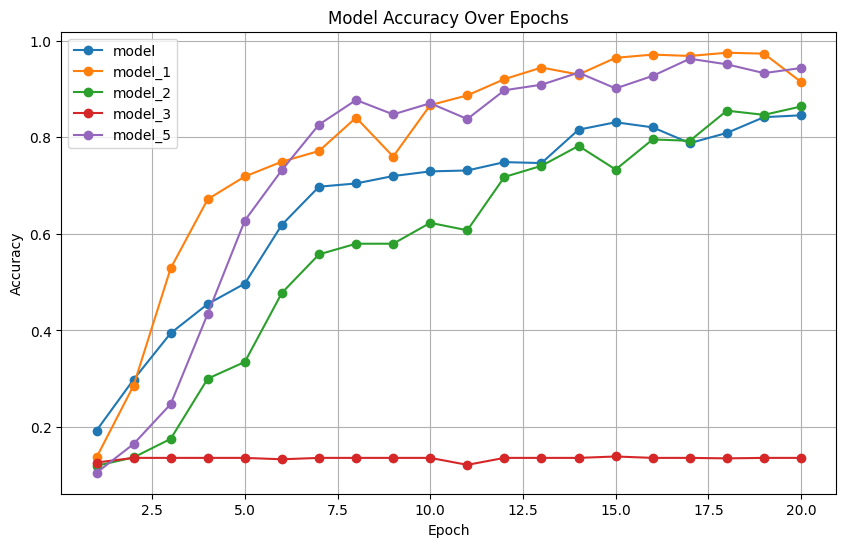

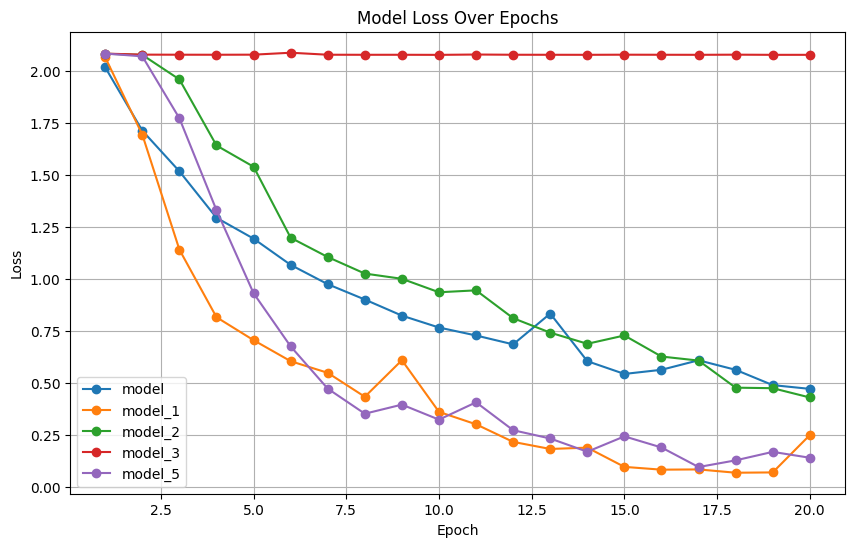

In [8]:
plot_model_metrics(history_graphing)

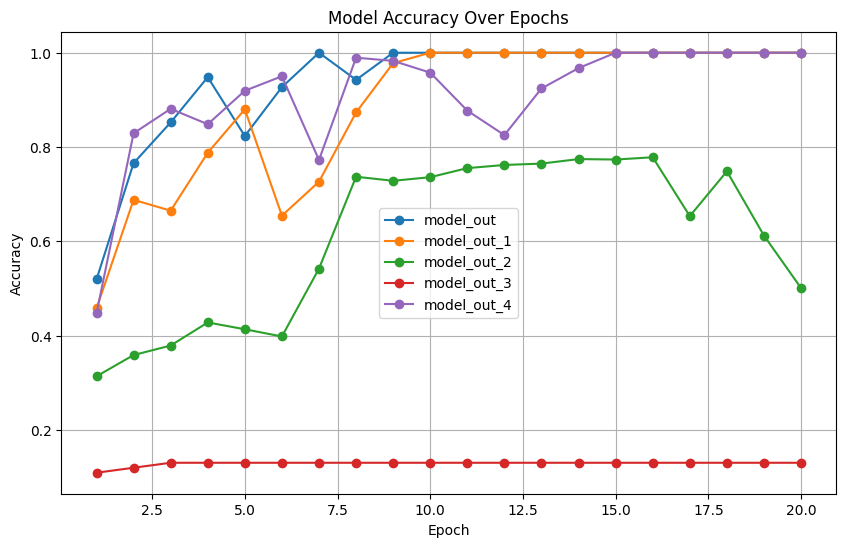

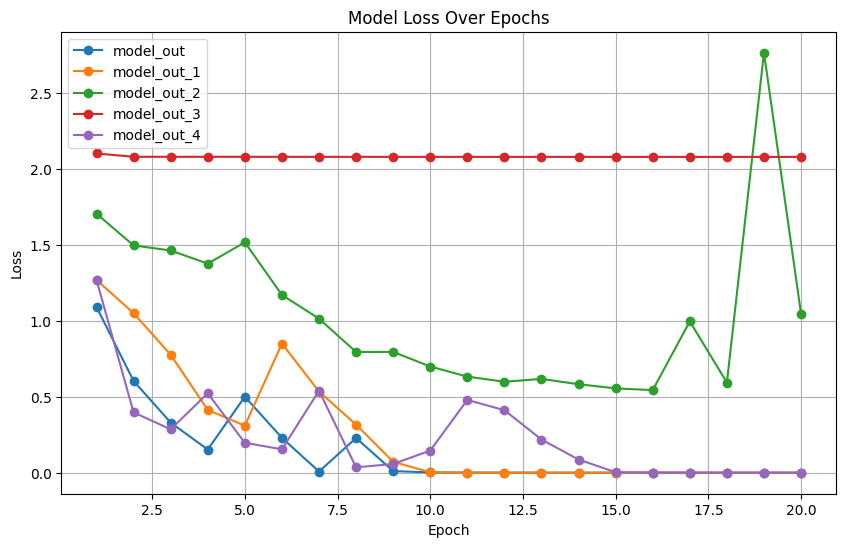

In [9]:
plot_model_metrics(history_out_graphing)